In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [4]:
athlete_height = pd.read_csv('olympic_data/athlete_events_cleaned.csv')
athlete_height.head()

,Unnamed: 0,Row,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,1,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,2,2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,3,3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,4,4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
athlete_height = athlete_height.drop(columns = ['Row','Age','Weight', 'Unnamed: 0', 'Games','Event'])

In [6]:
athlete_height = athlete_height.dropna(axis = 0, subset = ['Height'])

In [7]:
athlete_height = athlete_height.sort_values(['NOC'])
athlete_height.head()

,ID,Name,Sex,Height,Team,NOC,Year,Season,City,Sport,Medal
122575,61961,Tahmina Kohistani,F,160.0,Afghanistan,AFG,2012,Summer,London,Athletics,NaN
267222,133692,Khojawahid Zahedi,M,178.0,Afghanistan,AFG,1980,Summer,Moskva,Wrestling,NaN
49455,25470,Aka-Jahan Dastagir,M,170.0,Afghanistan,AFG,1968,Summer,Mexico City,Wrestling,NaN
49456,25471,Ghulam Dastagir,M,180.0,Afghanistan,AFG,1968,Summer,Mexico City,Wrestling,NaN
267228,133698,Abdul Wahab Zahiri,M,175.0,Afghanistan,AFG,2016,Summer,Rio de Janeiro,Athletics,NaN


In [8]:
athlete_height.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210945 entries, 122575 to 236636
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      210945 non-null  int64  
 1   Name    210945 non-null  object 
 2   Sex     210945 non-null  object 
 3   Height  210945 non-null  float64
 4   Team    210945 non-null  object 
 5   NOC     210945 non-null  object 
 6   Year    210945 non-null  int64  
 7   Season  210945 non-null  object 
 8   City    210945 non-null  object 
 9   Sport   210945 non-null  object 
 10  Medal   31072 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 19.3+ MB


In [9]:
athlete_height.astype({'Height': 'int32'}).dtypes

ID         int64
Name      object
Sex       object
Height     int32
Team      object
NOC       object
Year       int64
Season    object
City      object
Sport     object
Medal     object
dtype: object

In [10]:
MenOverTime = athlete_height[(athlete_height.Sex == 'M')]
WomenOverTime = athlete_height[(athlete_height.Sex == 'F')]

MenOverTimeGold = athlete_height[(athlete_height.Sex == 'M') & (athlete_height.Medal == 'Gold')]
WomenOverTimeGold = athlete_height[(athlete_height.Sex == 'F') & (athlete_height.Medal == 'Gold')]

MenOverTimeSilver = athlete_height[(athlete_height.Sex == 'M') & (athlete_height.Medal == 'Silver')]
WomenOverTimeSilver = athlete_height[(athlete_height.Sex == 'F') & (athlete_height.Medal == 'Silver')]

MenOverTimeBronze = athlete_height[(athlete_height.Sex == 'M') & (athlete_height.Medal == 'Bronze')]
WomenOverTimeBronze = athlete_height[(athlete_height.Sex == 'F') & (athlete_height.Medal == 'Bronze')]

MenOverTimeNoWin = athlete_height[(athlete_height.Sex == 'M') & (athlete_height.Medal == 'Null')]
WomenOverTimeNoWin = athlete_height[(athlete_height.Sex == 'F') & (athlete_height.Medal == 'NaN')]

In [11]:
MenOverTimeNoWin.head()

,ID,Name,Sex,Height,Team,NOC,Year,Season,City,Sport,Medal


In [12]:
WomenOverTime.head()

,ID,Name,Sex,Height,Team,NOC,Year,Season,City,Sport,Medal
122575,61961,Tahmina Kohistani,F,160.0,Afghanistan,AFG,2012,Summer,London,Athletics,NaN
266399,133277,Kamia Yousufi,F,165.0,Afghanistan,AFG,2016,Summer,Rio de Janeiro,Athletics,NaN
197773,99303,Friba Razayee,F,165.0,Afghanistan,AFG,2004,Summer,Athina,Judo,NaN
264047,132125,Robina Muqim Yaar,F,180.0,Afghanistan,AFG,2008,Summer,Beijing,Athletics,NaN
264046,132125,Robina Muqim Yaar,F,180.0,Afghanistan,AFG,2004,Summer,Athina,Athletics,NaN


Text(0.5, 1.0, 'Variation of Male Athletes Height')

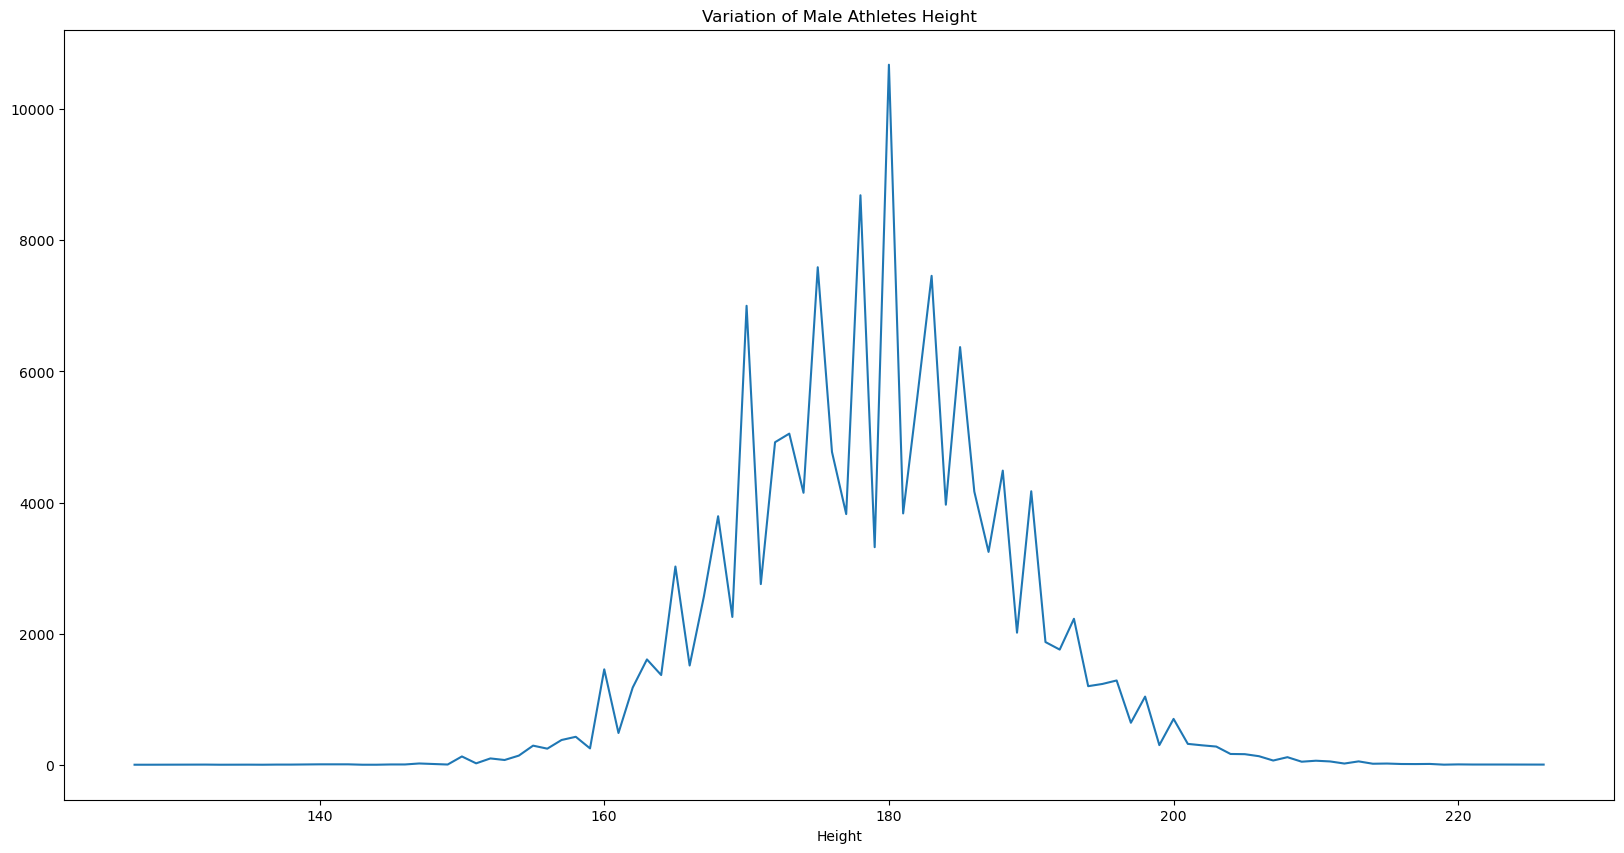

In [13]:
part = MenOverTime.groupby('Height')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'M'].plot()
plt.title('Variation of Male Athletes Height')

Text(0.5, 1.0, 'Variation of Male Athletes Height Who Won Gold')

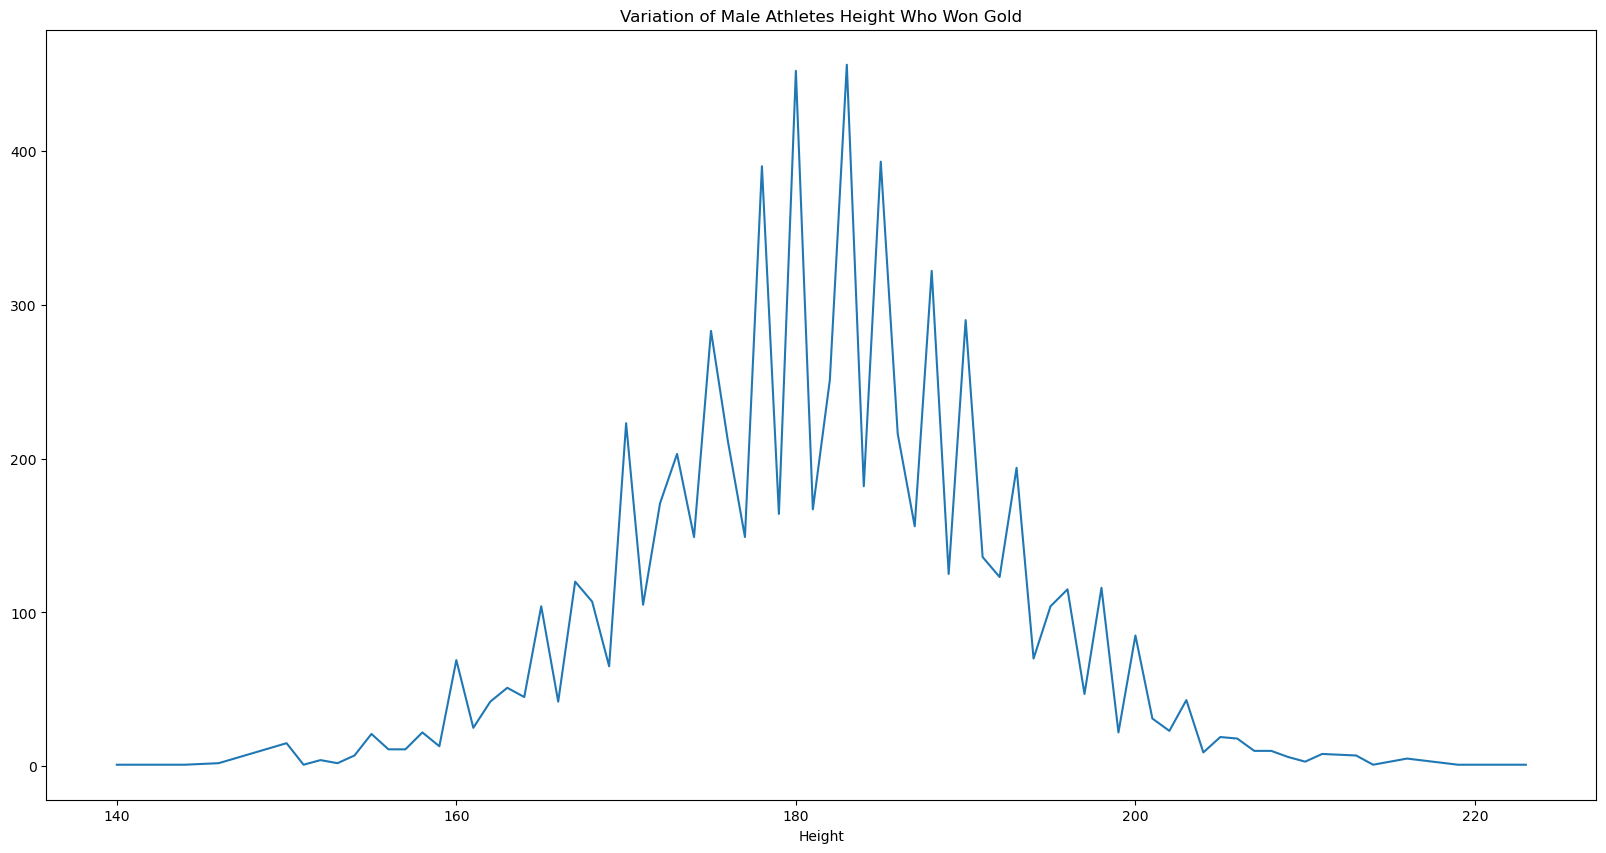

In [14]:
part = MenOverTimeGold.groupby('Height')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'M'].plot()
plt.title('Variation of Male Athletes Height Who Won Gold')

Text(0.5, 1.0, 'Variation of Male Athletes Height Who Won Silver')

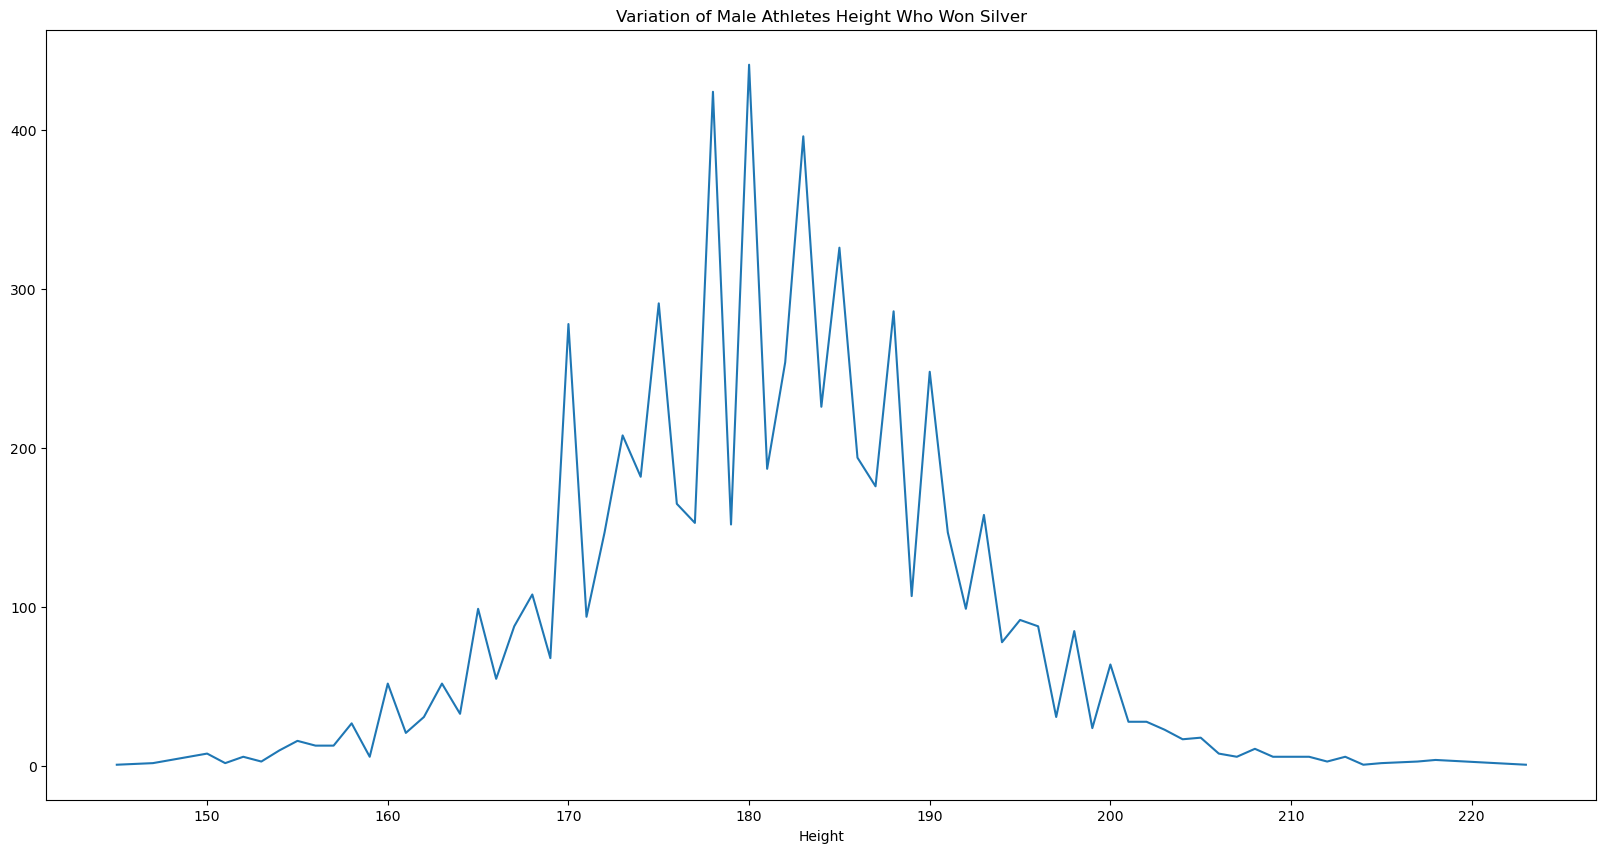

In [15]:
part = MenOverTimeSilver.groupby('Height')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'M'].plot()
plt.title('Variation of Male Athletes Height Who Won Silver')

Text(0.5, 1.0, 'Variation of Male Athletes Height Who Won Bronze')

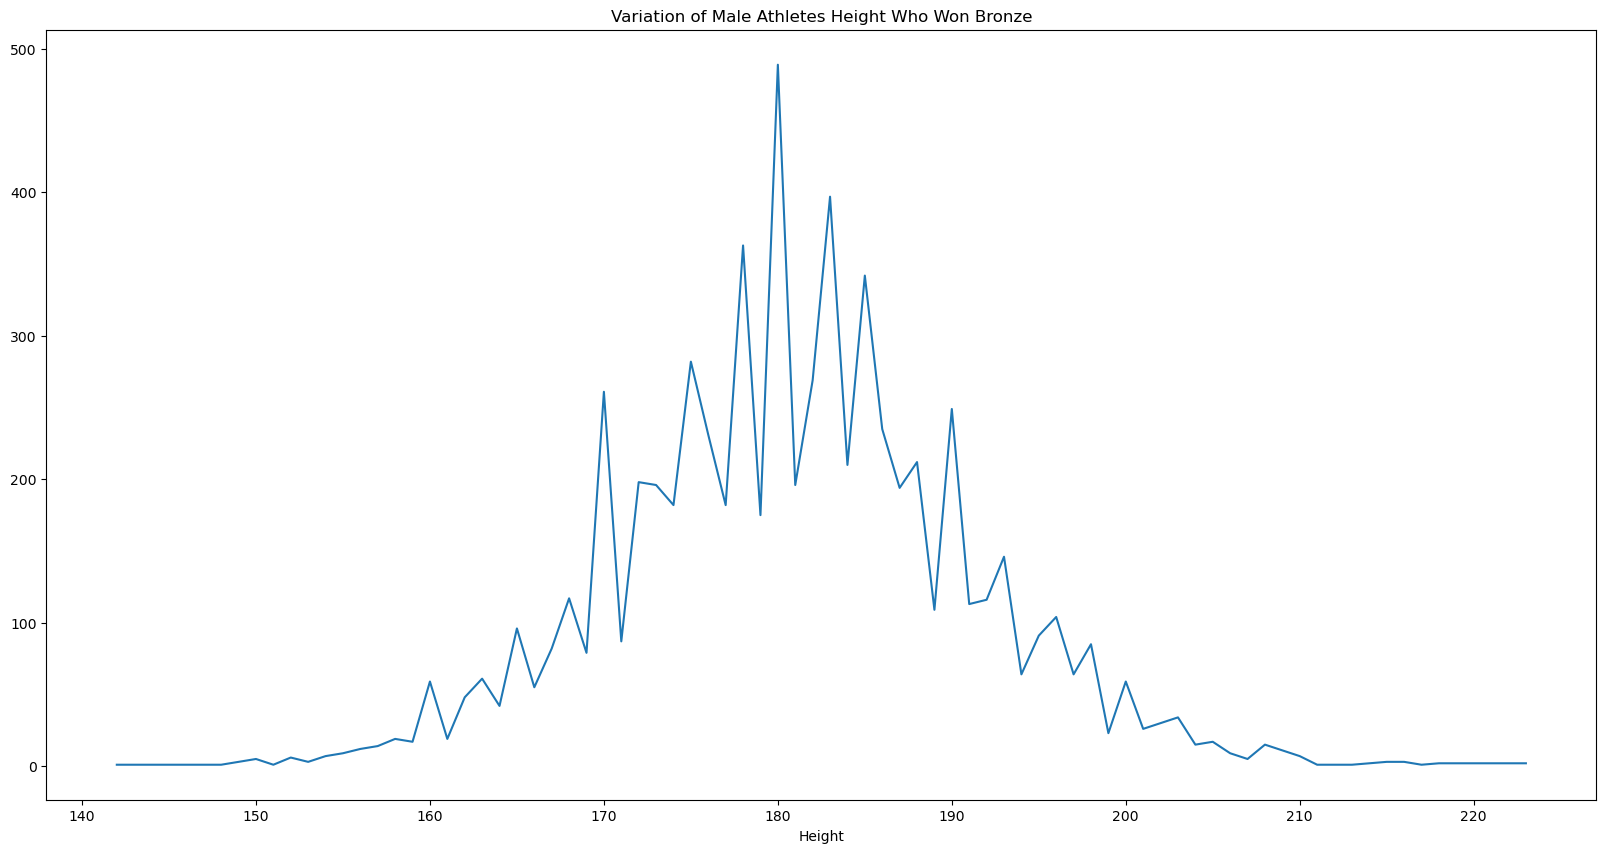

In [16]:
part = MenOverTimeBronze.groupby('Height')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'M'].plot()
plt.title('Variation of Male Athletes Height Who Won Bronze')

Text(0.5, 1.0, 'Variation of Female Athletes Height')

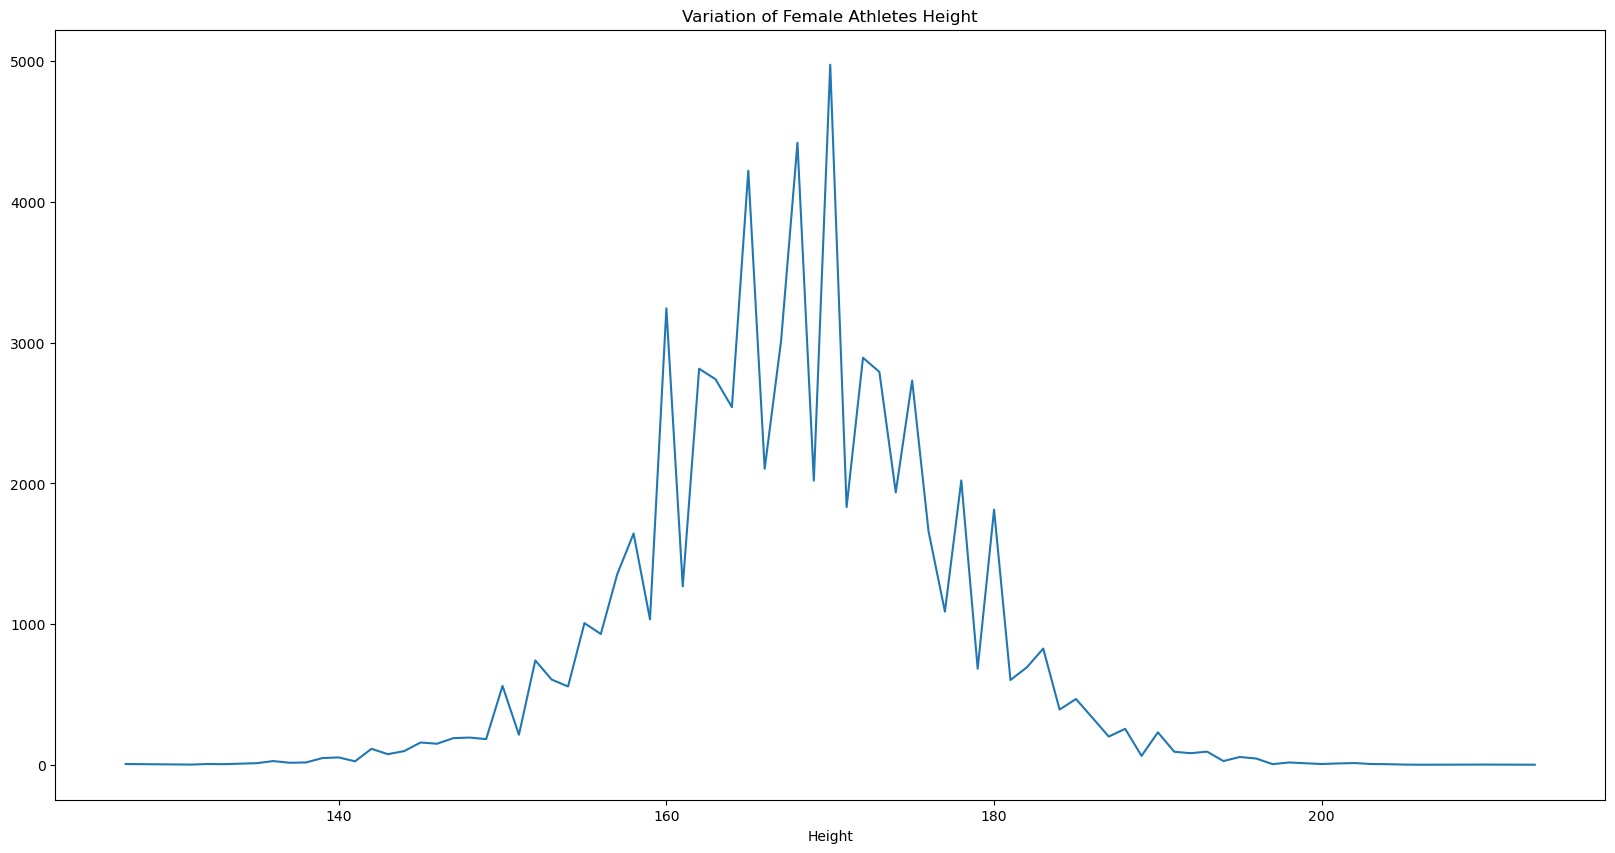

In [17]:
part = WomenOverTime.groupby('Height')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'F'].plot()
plt.title('Variation of Female Athletes Height')

Text(0.5, 1.0, 'Variation of Female Athletes Height Who Won Gold')

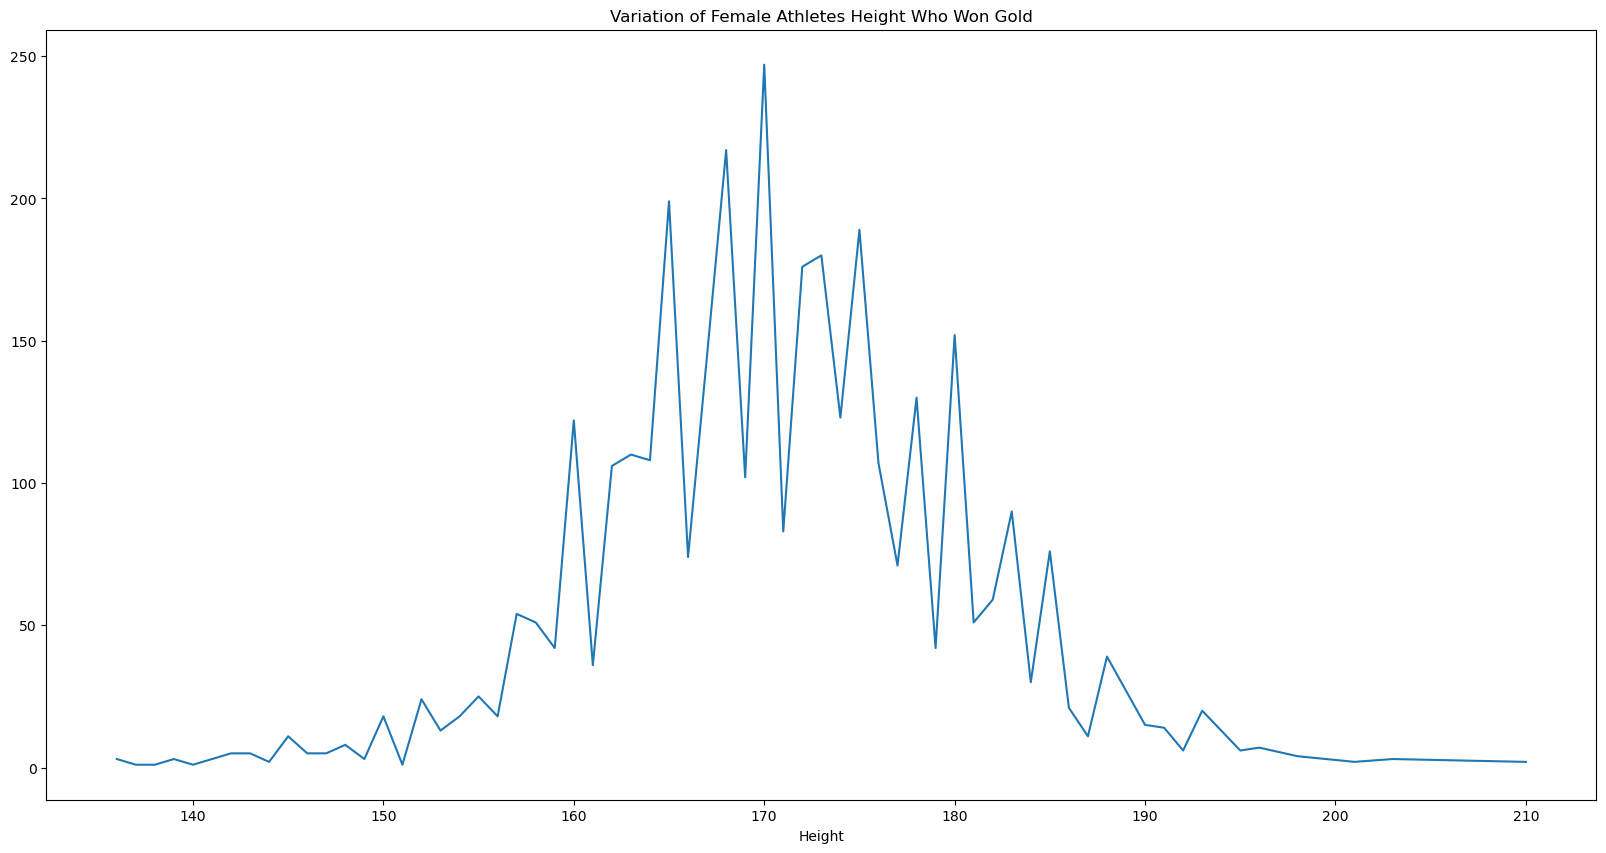

In [18]:
part = WomenOverTimeGold.groupby('Height')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'F'].plot()
plt.title('Variation of Female Athletes Height Who Won Gold')

Text(0.5, 1.0, 'Variation of Female Athletes Height Who Won Silver')

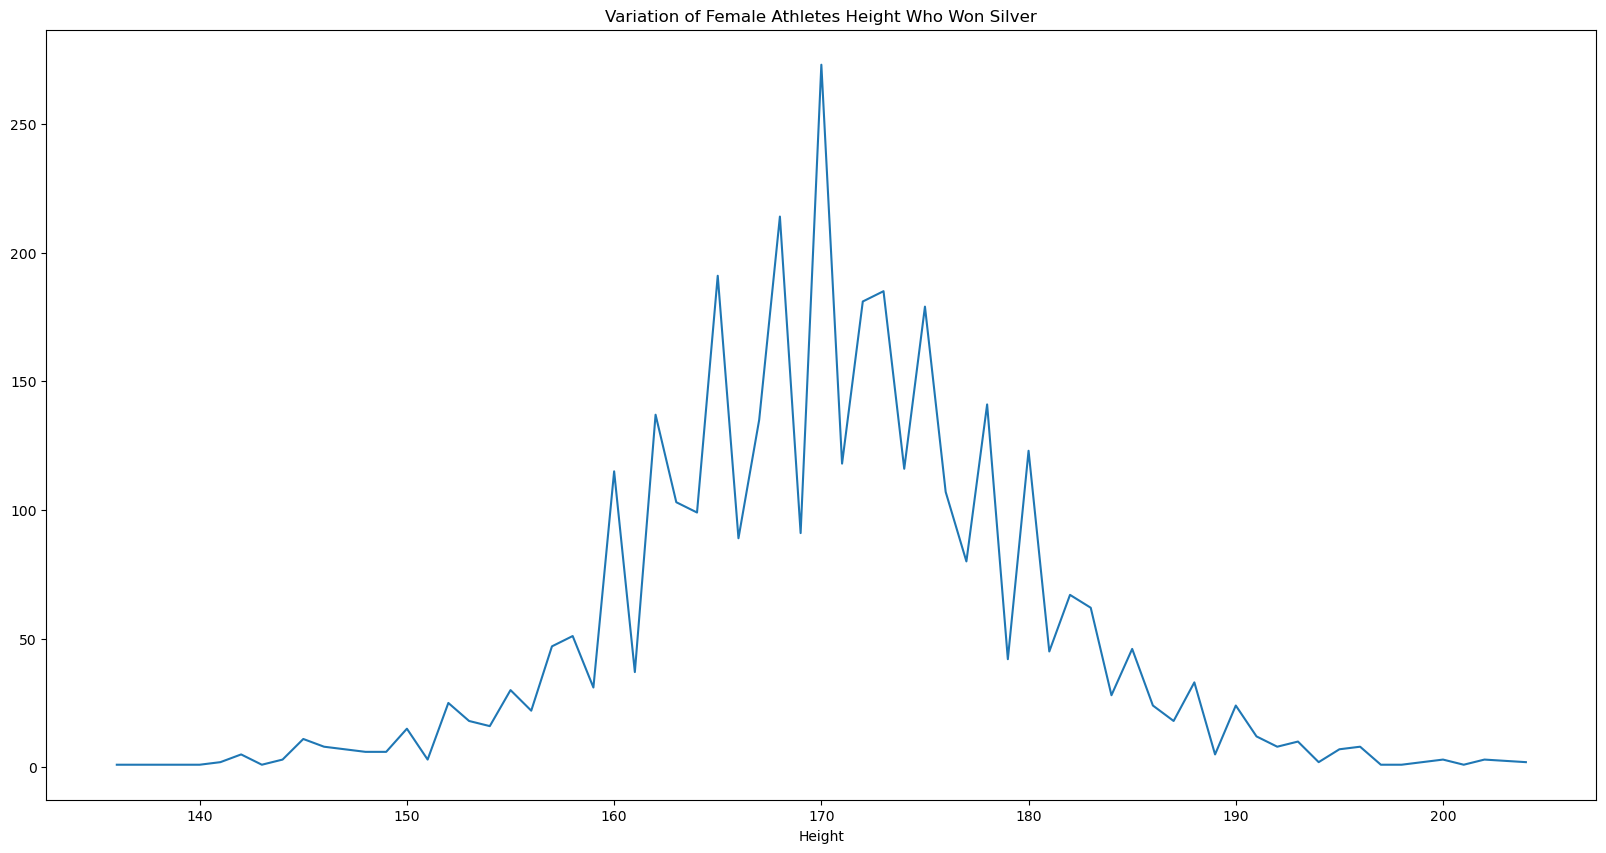

In [19]:
part = WomenOverTimeSilver.groupby('Height')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'F'].plot()
plt.title('Variation of Female Athletes Height Who Won Silver')

Text(0.5, 1.0, 'Variation of Female Athletes Height Who Won Bronze')

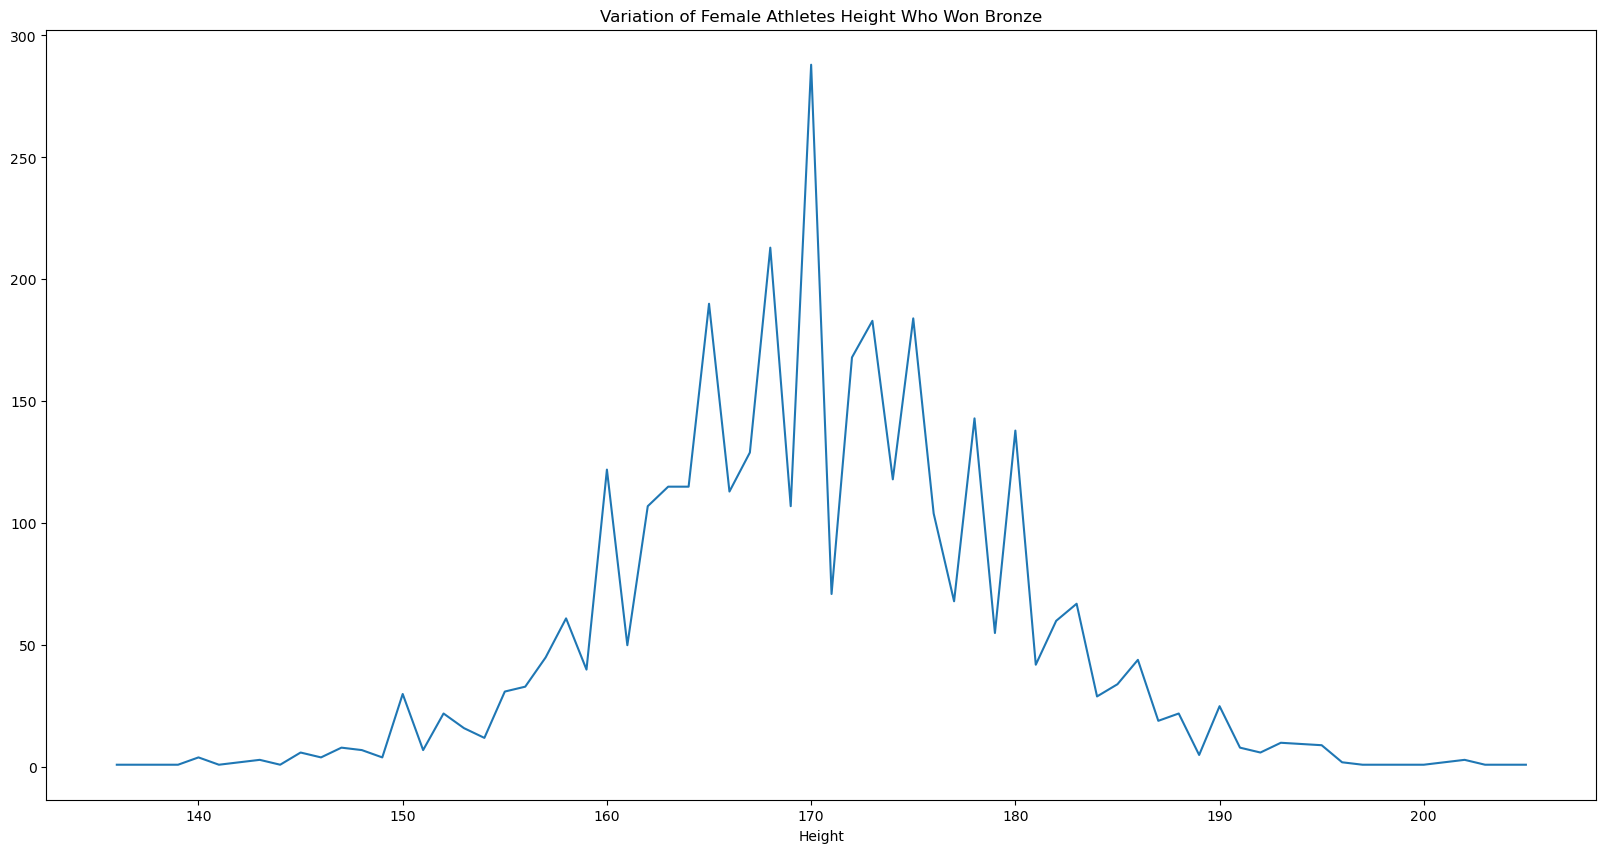

In [20]:
part = WomenOverTimeBronze.groupby('Height')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'F'].plot()
plt.title('Variation of Female Athletes Height Who Won Bronze')

In [36]:
tmp = athlete_height.groupby(['Sport'])['Height'].agg('mean').dropna()
df1 = pd.DataFrame(tmp).reset_index()
tmp2 = athlete_height.groupby(['Sport'])['ID'].count()
df2 = pd.DataFrame(tmp2).reset_index()
dataset = df1.merge(df2)
dataset.head()

,Sport,Height,ID
0,Alpine Skiing,173.489052,6394
1,Archery,173.203085,1945
2,Art Competitions,174.644068,59
3,Athletics,176.256268,32907
4,Badminton,174.178803,1387


In [37]:
hover_text = []
for index, row in dataset.iterrows():
    hover_text.append(('Sport: {}<br>'+
                      'Number of athlets: {}<br>'+
                      'Mean Height: {}<br>').format(row['Sport'],
                                            row['ID'],
                                            round(row['Height'],2)
                                            ))
dataset['hover_text'] = hover_text

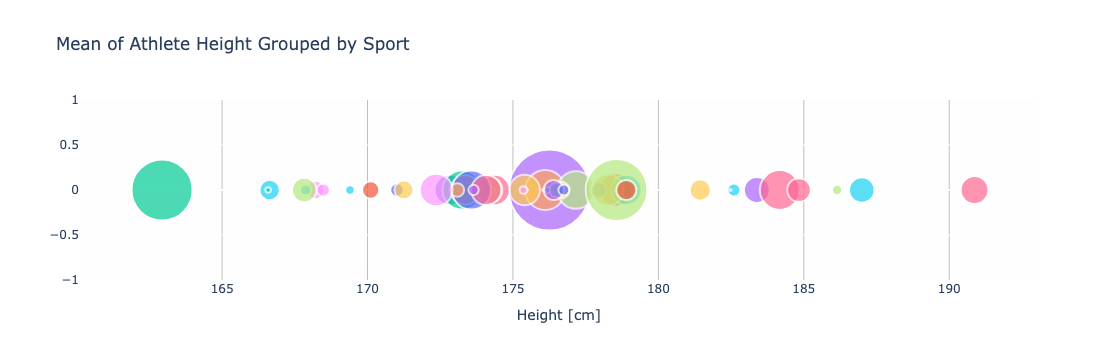

In [41]:
data = []
for sport in dataset['Sport']:
    ds = dataset[dataset['Sport']==sport]
    trace = go.Scatter(
        x = ds['Height'],
        
        name = sport,
        marker=dict(
            symbol='circle',
            sizemode='area',
            sizeref=10,
            size=ds['ID'],
            line=dict(
                width=2
            ),),
        text = ds['hover_text']
    )
    data.append(trace)
                         
layout = go.Layout(
    title='Mean of Athlete Height Grouped by Sport',
    xaxis=dict(
        title='Height [cm]',
        gridcolor='rgb(128, 128, 128)',
        zerolinewidth=1,
        ticklen=1,
        gridwidth=0.5,

    ),
    paper_bgcolor='rgb(255,255,255)',
    plot_bgcolor='rgb(254, 254, 254)',
    showlegend=False,
)


fig = dict(data = data, layout = layout)

iplot(fig, filename='athletes_Height_measurements')